In [67]:
import pandas as pd
import glob

path = r'/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/translations/result/csv' # use your path
all_files = glob.glob(path + "/*.csv")

df_groupby_res = {"360": {}, "720": {}, "1080": {}}

for filename in all_files:
    tag, res  = filename.split('_')[-2:]
    res = res.split('.')[0]
    tag = tag.split('/')[-1]

    df = pd.read_csv(filename)
    df = df[['error', 'true_distance']]
    # display(res, tag)

    df_groupby_res[res].update({tag: df})


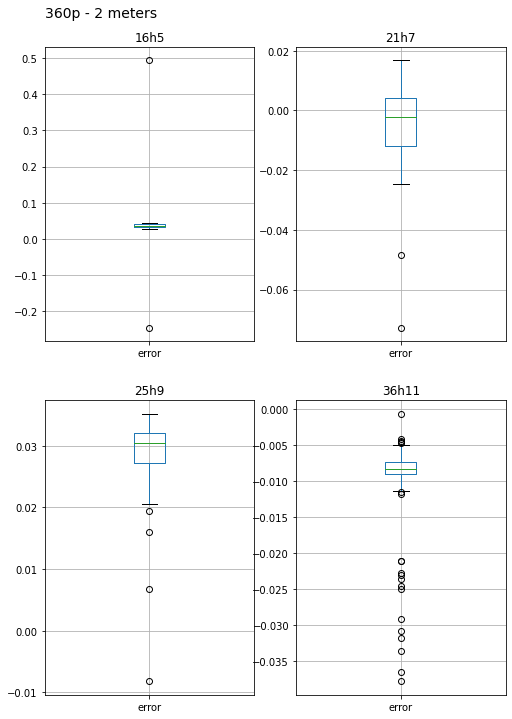

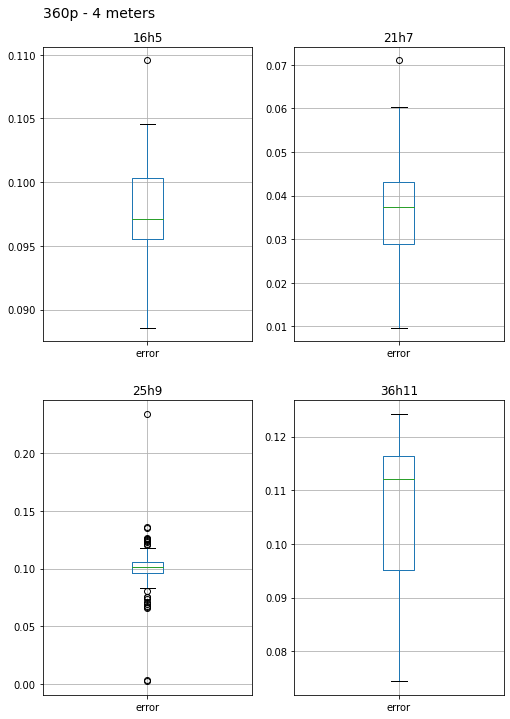

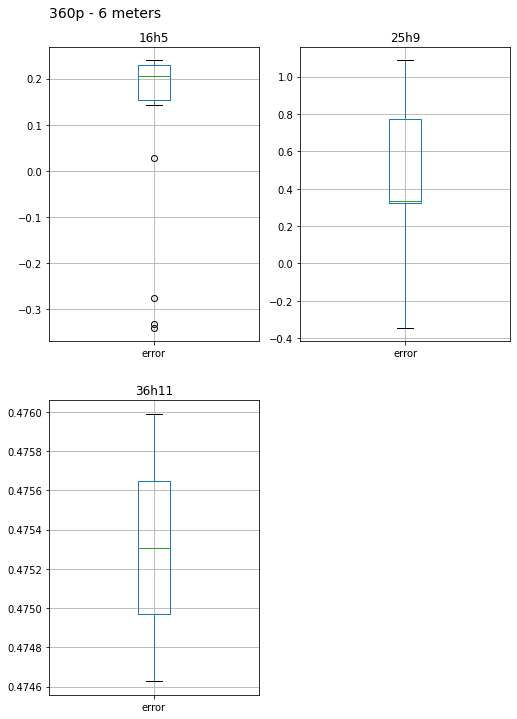

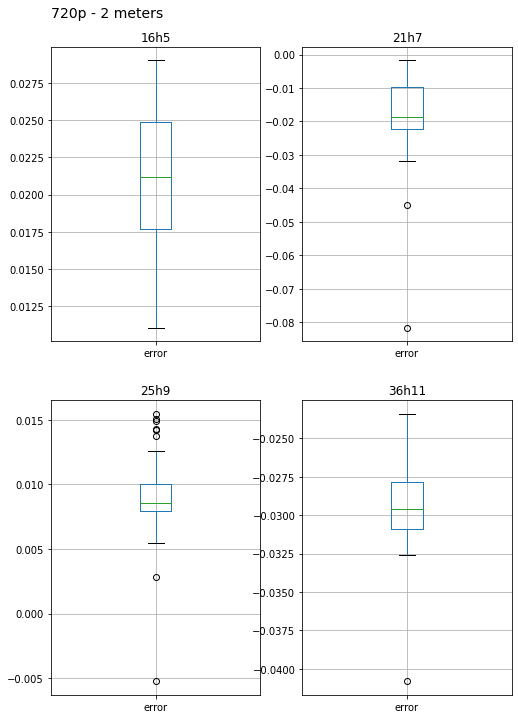

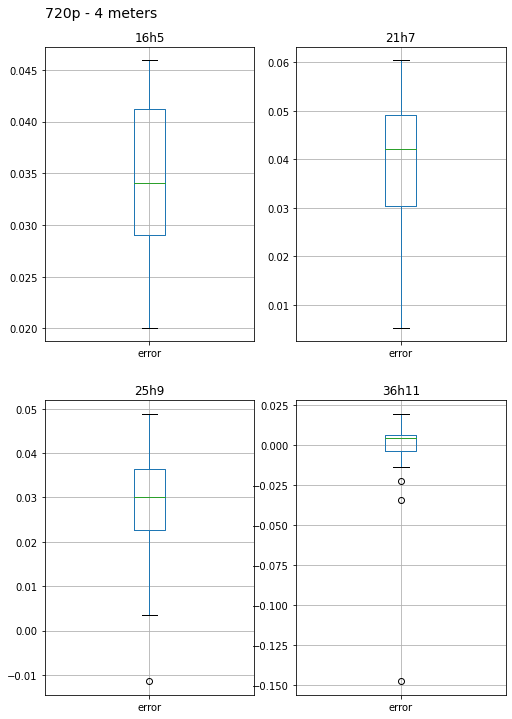

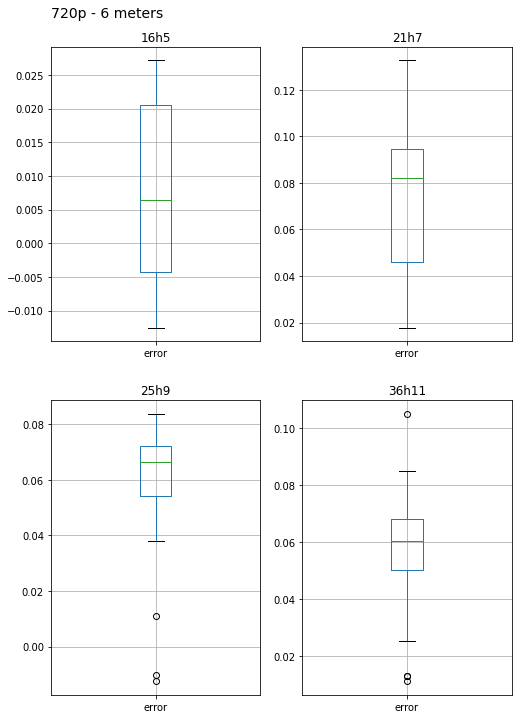

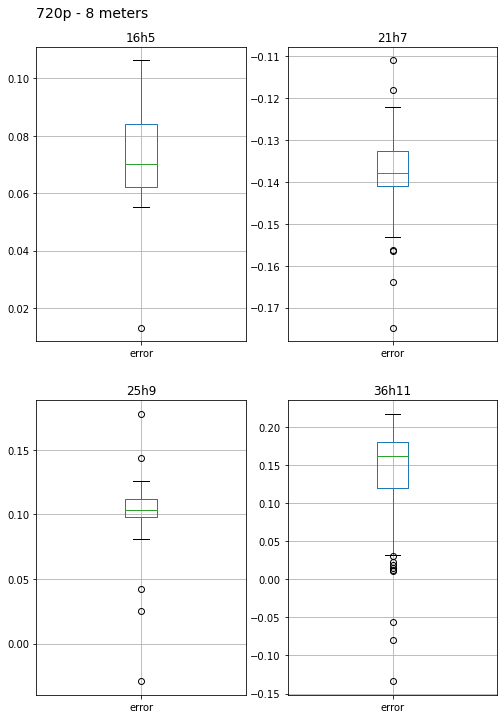

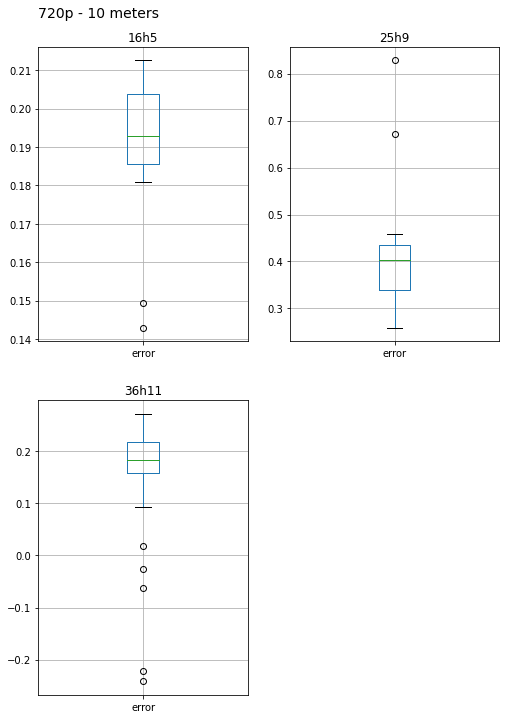

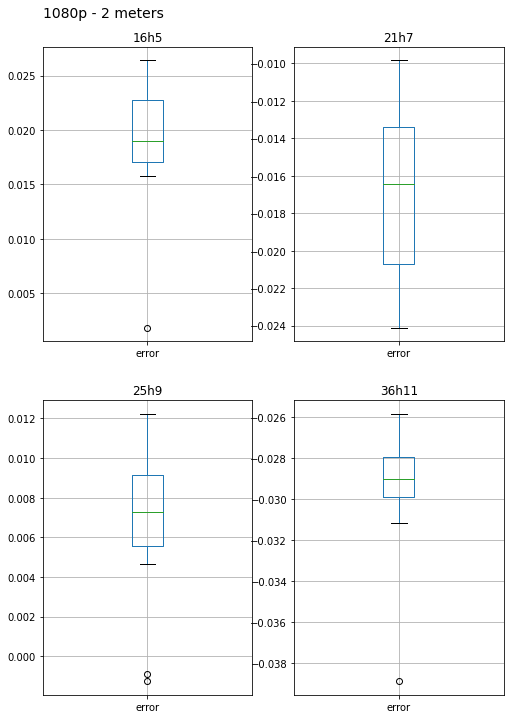

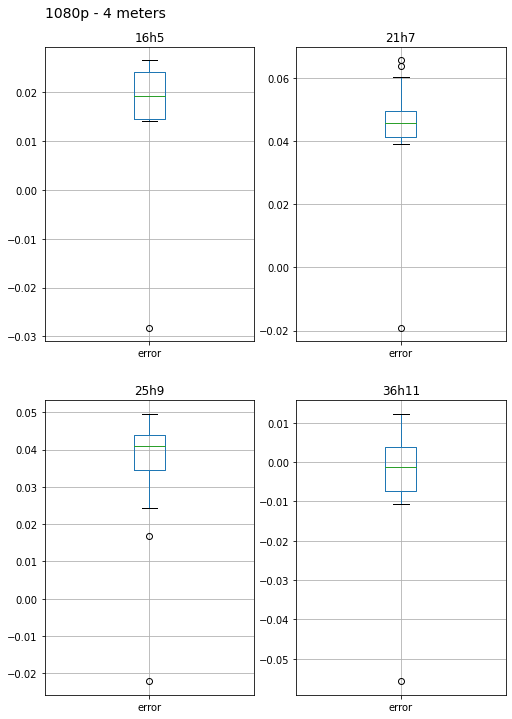

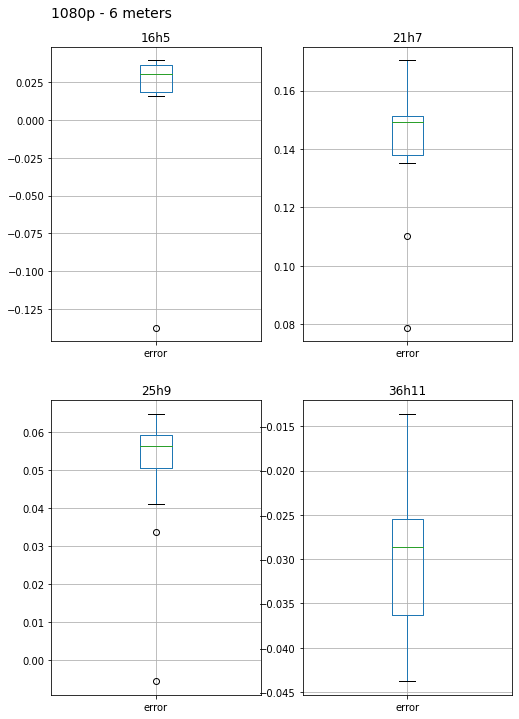

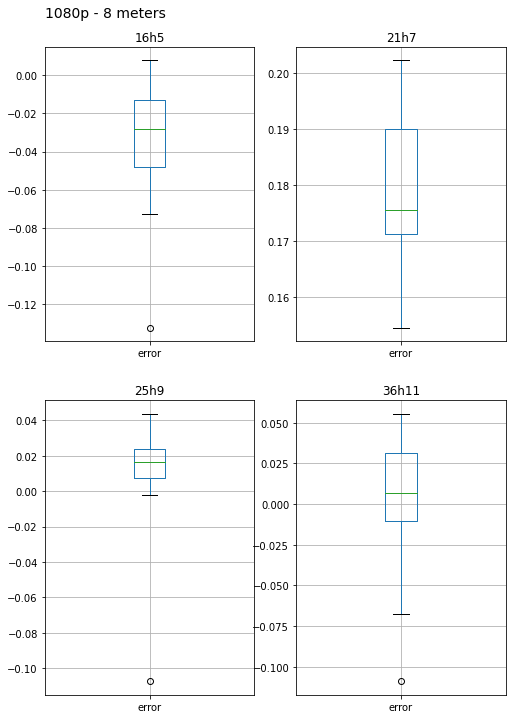

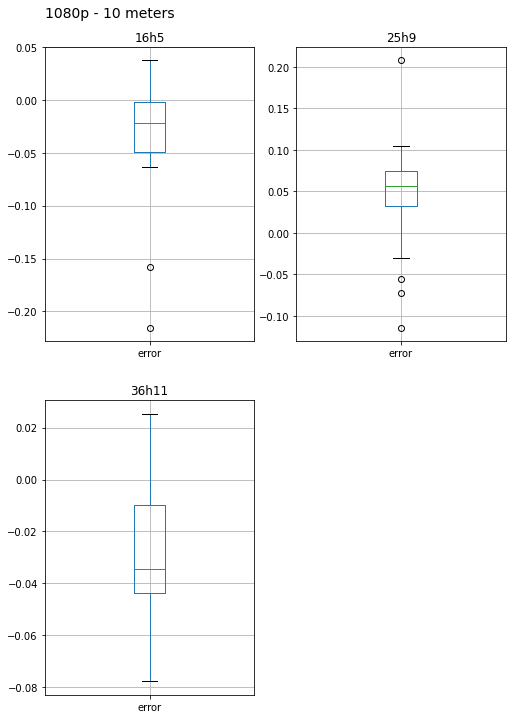

In [68]:
for key in df_groupby_res.keys(): # res level
    df = pd.concat(df_groupby_res[key]).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
    for distance in df['true_distance'].unique():
        ax = df.loc[df['true_distance']==distance].groupby('tag').boxplot(column=['error'], figsize=(8,12), sharey=False)
        dist_text = '{}p - {} meters'.format(key, distance)
        ax[0].text(0, 1.1, s=dist_text, fontsize=14,  transform = ax[0].transAxes)
